## Predictive Maintenance for milling machines

### The below using machine learning to predict failure events on milling machines using below dataset

This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

type: just the product type L, M or H from column 2

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes


tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.


This dataset is part of the following publication, please cite when using this dataset:
S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023.

### Loading the data and visualizations

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("ai4i2020.csv")
display(df)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
1,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
2,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
3,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
4,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9995,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9996,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9997,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


import numpy as np
from google.colab import autoviz
df_134280993260493715 = autoviz.get_registered_df('df_134280993260493715')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_134280993260493715, *['UDI'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6453498400087923305 = autoviz.get_registered_df('df_6453498400087923305')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6453498400087923305, *['Air temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8820562162226196264 = autoviz.get_registered_df('df_8820562162226196264')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8820562162226196264, *['Process temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2756883669334384386 = autoviz.get_registered_df('df_2756883669334384386')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2756883669334384386, *['Rotational speed [rpm]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5958443247219282407 = autoviz.get_registered_df('df_5958443247219282407')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5958443247219282407, *['UDI'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3630146651688481305 = autoviz.get_registered_df('df_3630146651688481305')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3630146651688481305, *['Air temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6053006509791869498 = autoviz.get_registered_df('df_6053006509791869498')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6053006509791869498, *['Process temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3868562228239308096 = autoviz.get_registered_df('df_3868562228239308096')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3868562228239308096, *['Rotational speed [rpm]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7831839592365808874 = autoviz.get_registered_df('df_7831839592365808874')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7831839592365808874, *['Type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7368629879839219734 = autoviz.get_registered_df('df_7368629879839219734')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7368629879839219734, *[[['UDI', 'Air temperature [K]'], ['Air temperature [K]', 'Process temperature [K]'], ['Process temperature [K]', 'Rotational speed [rpm]'], ['Rotational speed [rpm]', 'Torque [Nm]']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5657825497414789984 = autoviz.get_registered_df('df_5657825497414789984')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5657825497414789984, *['UDI', 'Type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_2131633078857146347 = autoviz.get_registered_df('df_2131633078857146347')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2131633078857146347, *['Air temperature [K]', 'Type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_4624671535892937614 = autoviz.get_registered_df('df_4624671535892937614')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4624671535892937614, *['Process temperature [K]', 'Type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_9180832524360391423 = autoviz.get_registered_df('df_9180832524360391423')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_9180832524360391423, *['Rotational speed [rpm]', 'Type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_8127376551720178255 = autoviz.get_registered_df('df_8127376551720178255')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8127376551720178255, *['UDI', 'Air temperature [K]', 'Type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3272068003036987801 = autoviz.get_registered_df('df_3272068003036987801')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3272068003036987801, *['UDI', 'Process temperature [K]', 'Type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3762714822959587325 = autoviz.get_registered_df('df_3762714822959587325')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3762714822959587325, *['UDI', 'Rotational speed [rpm]', 'Type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7884071972778636202 = autoviz.get_registered_df('df_7884071972778636202')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7884071972778636202, *['UDI', 'Torque [Nm]', 'Type'], **{})
chart

### Lets see the histogram distributions of features
#### We see the dataset is very unbalanced for failures and non-failures and based on the type of milling equipment used we can use oversampling or other methods to improve this

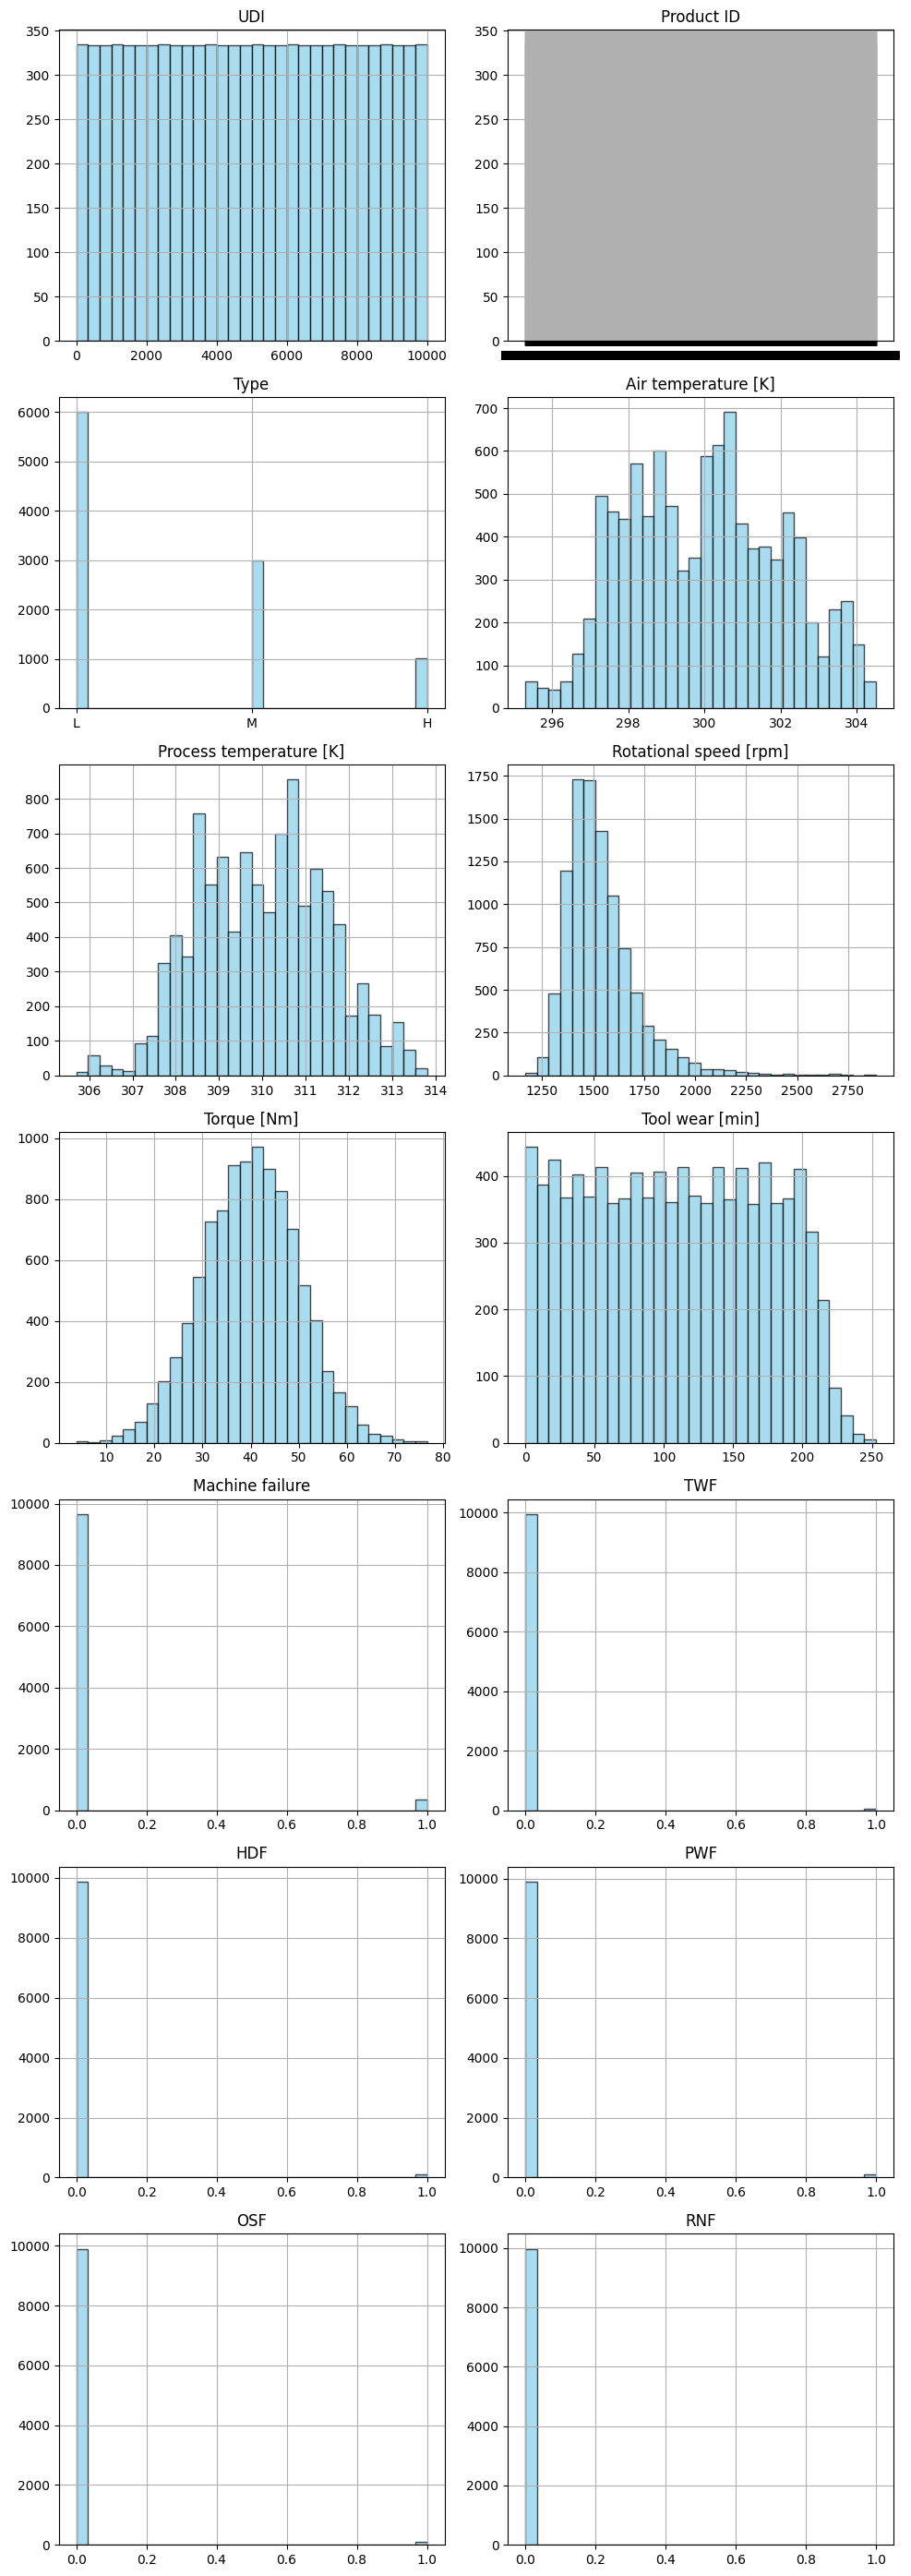

In [2]:
import matplotlib.pyplot as plt

# Calculate the number of rows needed for subplots
n = len(df.columns)
n_rows = n//2 if n%2 == 0 else n//2 + 1

fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))  # adjust the size as needed
axes = axes.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate

for i in range(n):
    ax = axes[i]
    df[df.columns[i]].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()


#### Lets compare the feature with failure events

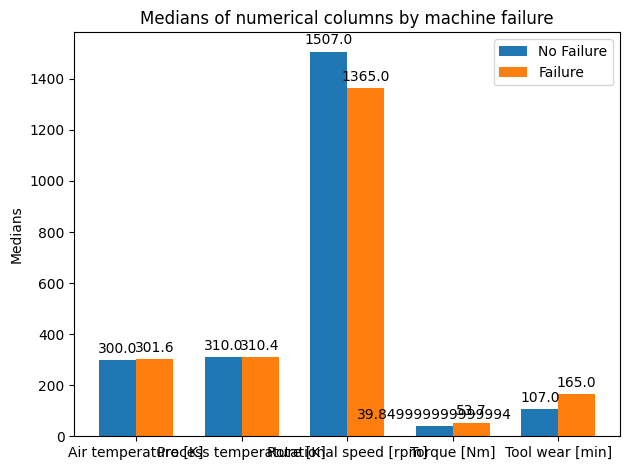

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe


# Separate the dataframe based on 'Machine failure'
df_failure = df[df['Machine failure'] == 1]
df_no_failure = df[df['Machine failure'] == 0]

# Find the median of the numerical columns for each group
median_failure = df_failure[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].median()
median_no_failure = df_no_failure[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].median()

# Prepare data for plotting
labels = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_values = median_failure.values
no_failure_values = median_no_failure.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, no_failure_values, width, label='No Failure')
rects2 = ax.bar(x + width/2, failure_values, width, label='Failure')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Medians')
ax.set_title('Medians of numerical columns by machine failure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Create a function to attach a label above each bar displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [12]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


#### Lets apply PCA to visualize how failure event differs from non failure event in terms of oveall dataset dimensionality

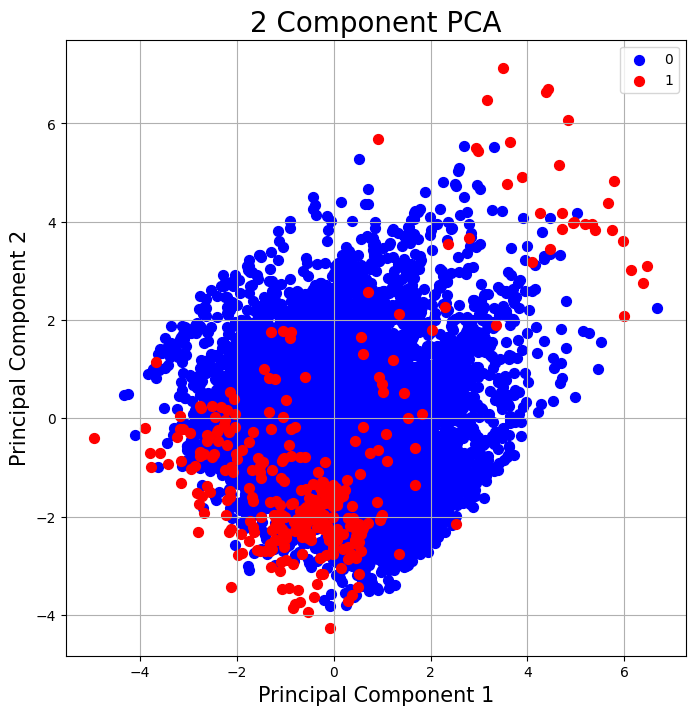

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Define the feature columns and the target column
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
target = 'Machine failure'

# Separating out the features and the target
x = df.loc[:, features].values
y = df.loc[:, [target]].values

# Standardize the feature matrix
x = StandardScaler().fit_transform(x)

# Apply PCA for 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate the target column
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)

# Visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['b', 'r']
for t, color in zip(targets, colors):
    indicesToKeep = finalDf[target] == t
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


#### Heatmap for correlation
#### We see all of  feature are weakly or not correlated with target

<ipython-input-5-963e4ae39643>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


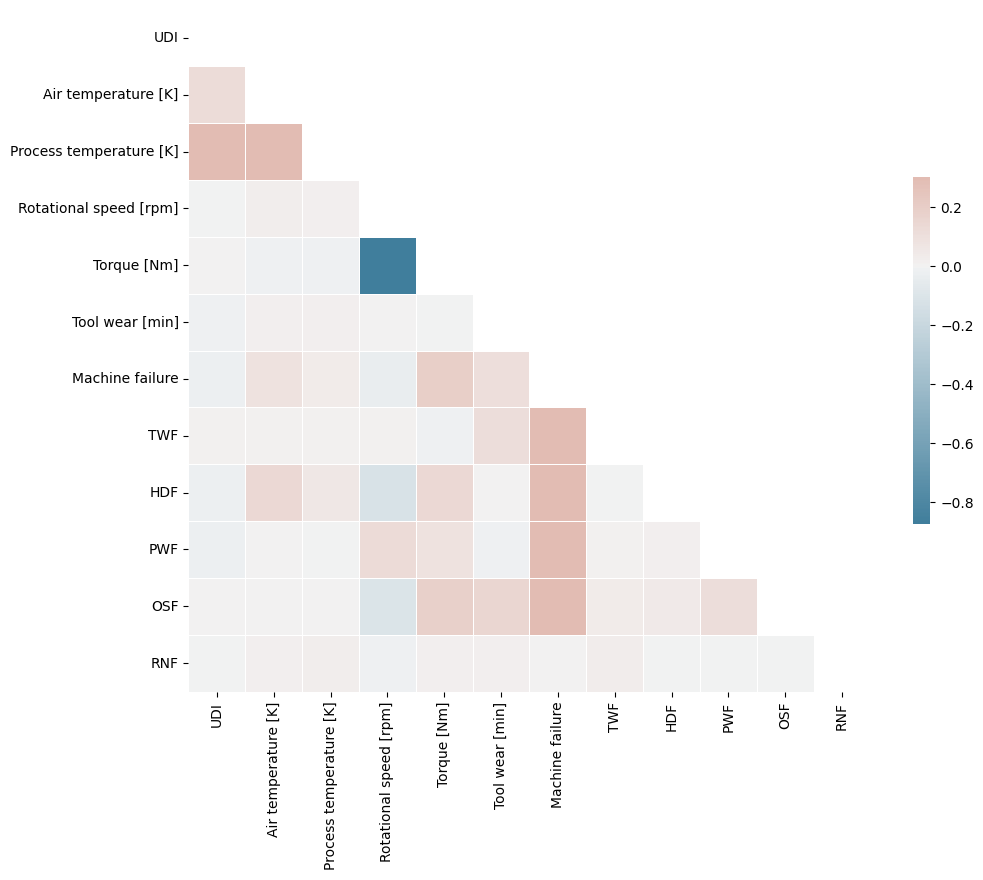

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


#### Lets check the propotions of imbalance for target

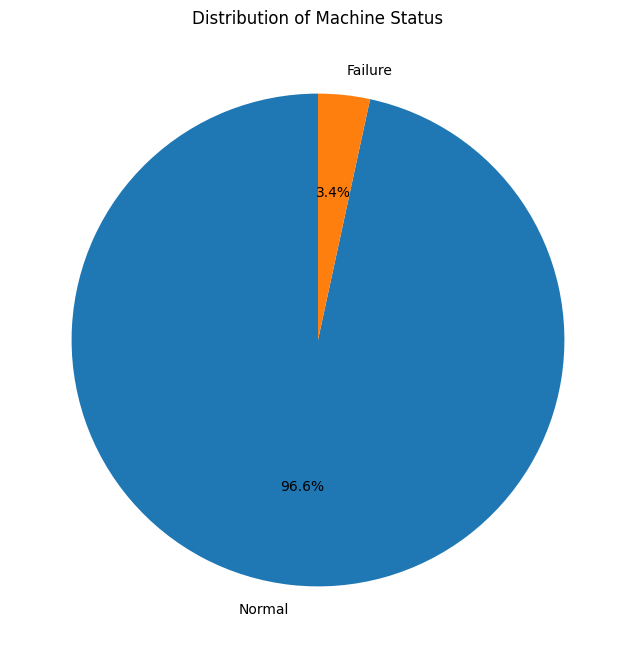

In [6]:
import matplotlib.pyplot as plt

# Count the number of failure vs normal rows
counts = df['Machine failure'].value_counts()

# Create labels for the two classes
labels = ['Normal', 'Failure'] if 0 in counts.index else ['Failure']

# Generate the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Machine Status')
plt.show()


### Lets apply a pipeline for
1. apply encoding to categorical features
2. Apply test train split on dataset
3. Apply preprocessing such as standardization and imputation
4. Initially we can use XGboost for classification


In [7]:

import pandas as pd
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

y = df['Machine failure']
X = df.drop('Machine failure', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_cols = ['Product ID','Type']


numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())])

categorical_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('categorical', categorical_preprocessing_steps, categorical_cols)])

# Apply SMOTE
smote = SMOTE(random_state=42)

# Define model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')



# Combine preprocessing with classifier
pipeline = imbPipeline(steps=[('preprocessor', preprocessor),
                              ('smote', smote),
                              ('classifier', model)])



pipeline.fit(X_train, y_train)

# Test the model
print(f'Test accuracy: {pipeline.score(X_test, y_test)}')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test accuracy: 0.9825


### Lets test our initial model scores against confusion matrix and differents types of machines

Test accuracy: 0.9825
F1 Score: 0.7852760736196319
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1919
           1       0.78      0.79      0.79        81

    accuracy                           0.98      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix
[[1901   18]
 [  17   64]]


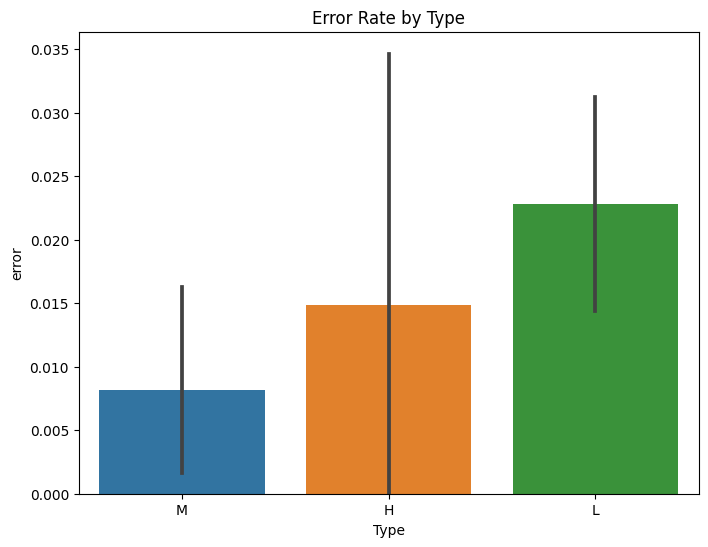

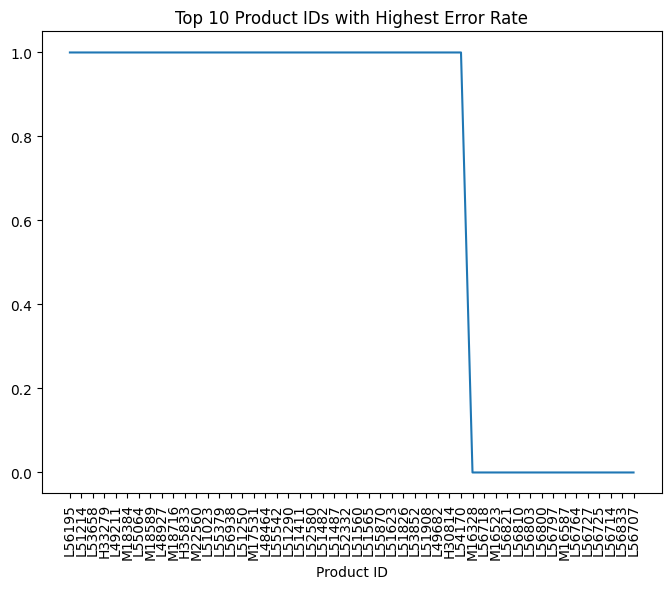

In [10]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_pred = pipeline.predict(X_test)
print(f'Test accuracy: {pipeline.score(X_test, y_test)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

# Error analysis for 'Type' and 'Product ID'
X_test_copy = X_test.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = y_pred
X_test_copy['error'] = X_test_copy['y_true'] != X_test_copy['y_pred']

# Plot error rate by 'Type'
plt.figure(figsize=(8, 6))
sns.barplot(data=X_test_copy, x='Type', y='error')
plt.title('Error Rate by Type')
plt.show()

# Calculate and plot error rate by 'Product ID' for top 50
error_rate_by_product = X_test_copy.groupby('Product ID')['error'].mean().sort_values(ascending=False)[:50]

plt.figure(figsize=(8, 6))
sns.lineplot(x=error_rate_by_product.index, y=error_rate_by_product.values)
plt.title('Top 10 Product IDs with Highest Error Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

#### Redo the XGboost model creation with imbalance libary to oversample synetically the failure events

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

y = df['Machine failure']
X = df.drop('Machine failure', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_cols = ['Product ID','Type']


numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())])

categorical_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('categorical', categorical_preprocessing_steps, categorical_cols)])

# Apply SMOTE
smote = SMOTE(random_state=42)

# Define model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')



# Combine preprocessing with classifier
pipeline = imbPipeline(steps=[('preprocessor', preprocessor),
                              ('smote', smote),
                              ('classifier', model)])



pipeline.fit(X_train, y_train)

# Test the model
print(f'Test accuracy: {pipeline.score(X_test, y_test)}')

#### In the below code we are using optuna to optimize the XGboost classifier

In [14]:
import optuna
import pandas as pd
import xgboost as xgb
from optuna import Trial
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

import optuna
import pandas as pd
import xgboost as xgb
from optuna import Trial
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline



# Here, I assume that 'Machine failure' is the target column
y = df['Machine failure']
X = df.drop('Machine failure', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numerical and categorical columns
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_cols = ['Product ID','Type']

# Define preprocessing pipeline
numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())])

categorical_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('categorical', categorical_preprocessing_steps, categorical_cols)])

# Apply SMOTE
smote = SMOTE(random_state=42)

# Define model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Combine preprocessing with classifier
pipeline = imbPipeline(steps=[('preprocessor', preprocessor),
                              ('smote', smote),
                              ('classifier', model)])

def objective(trial: Trial) -> float:
    param = {
        "classifier__n_estimators": trial.suggest_int("classifier__n_estimators", 50, 400),
        "classifier__max_depth": trial.suggest_int("classifier__max_depth", 3, 10),
        "classifier__learning_rate": trial.suggest_float("classifier__learning_rate", 1e-4, 1e-1, log=True),
        "classifier__subsample": trial.suggest_float("classifier__subsample", 0.5, 1.0),
        "classifier__colsample_bytree": trial.suggest_float("classifier__colsample_bytree", 0.5, 1.0),
    }
    pipeline.set_params(**param)

    # Use 5-fold cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=3)

# Print out the best params
print(f'Best params: {study.best_params}')

# Re-train the model with best parameters
best_params = study.best_params
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Test the model
print(f'Test accuracy: {pipeline.score(X_test, y_test)}')
y_pred = pipeline.predict(X_test)
print(f'F1 Score: {f1_score(y_test, y_pred)}')




/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[I 2023-07-15 08:41:36,011] A new study created in memory with name: no-name-46849005-3323-4145-a534-25abd006922c
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_la

Best params: {'classifier__n_estimators': 185, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.01638016188965437, 'classifier__subsample': 0.820801764887605, 'classifier__colsample_bytree': 0.5046883636971979}
Test accuracy: 0.9695
F1 Score: 0.6666666666666667


### Lets compare different types of classifiers and apply on the dataset and compare the results

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


F1 Score for Logistic Regression: 0.9875
F1 Score for Random Forest: 0.9811320754716981
F1 Score for LightGBM: 0.9875
F1 Score for XGBoost: 0.9875
F1 Score for SVM: 0.9875


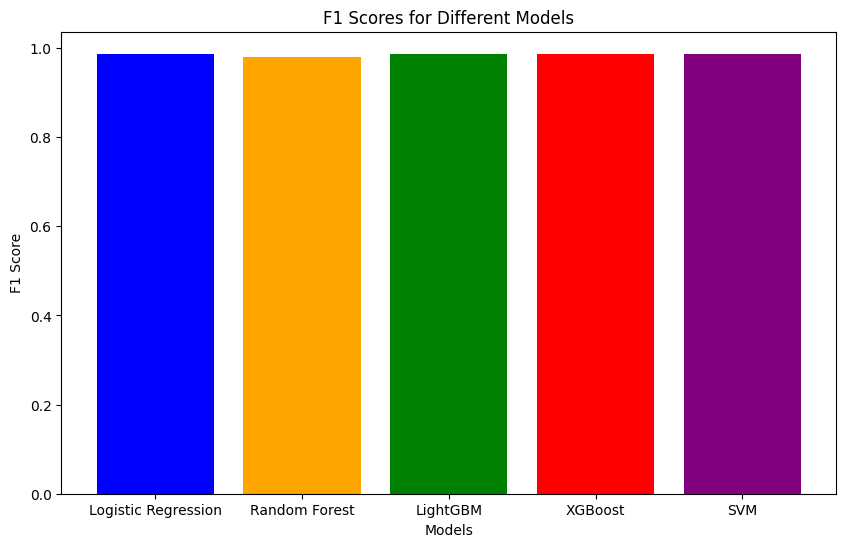

In [17]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Here, I assume that 'Machine failure' is the target column
y = df['Machine failure']
X = df.drop('Machine failure', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify numerical and categorical columns
numeric_cols = ['UDI','Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','TWF',	'HDF',	'PWF','OSF',	'RNF']
categorical_cols = ['Product ID','Type']

# Define preprocessing pipeline
numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())])

categorical_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('categorical', categorical_preprocessing_steps, categorical_cols)])

# Apply SMOTE
smote = SMOTE(random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=300),
    'LightGBM': lgb.LGBMClassifier(n_estimators=300),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC()
}

# Store f1 scores
f1_scores = []

# Fit and evaluate models
for model_name, model in models.items():
    pipeline = imbPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', smote),
                                  ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f'F1 Score for {model_name}: {f1}')

# Plot F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), f1_scores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.show()
